# Group 34: Predicting Subscription Status from Age and Play Time

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readr)
library(ggplot2)
library(dplyr)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Introduction

As more improvements and innovations have been made in different aspects of video games such as mode and style design, video games started to play significant roles in the daily lives of individuals. A research group in the Computer Science department at the University of British Columbia (UBC), led by Professor Frank Wood, has established a Minecraft research server to collect data on how people interact within the game environment (1). Specifically, this research group collected two datasets, the players.csv summarized data about player information, and the sessions.csv which summarizes playing sessions. Our report further analyzes the data collected by this research group to investigate a specific question: Can total played hours and age predict subscription in the players.csv dataset? It is expected that players with greater played hours and a younger age would tend to subscribe the game-related newsletter.
<br>
<br>
In the players.csv dataset, there are 196 observations with 7 variables, summarizing players' information on the Minecraft server. Numerical data contains played hours and player age, character data contains the level of experience on the game, hashed email (user identifier), name of the players, and gender of the players. Logical data contains the status of the subscription to a game-related newsletter.

## Methods

### Wrangling

In [3]:
url_players <- "https://raw.githubusercontent.com/lucy-diaz/DSCIprojectgroup34/refs/heads/main/players.csv"
players <- read_csv(url_players)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [4]:
tidy_player<- players|>
        mutate(experience = factor(experience), gender = factor(gender),subscribe=factor(subscribe))
tidy_player

clean_player<- tidy_player|>
                select(subscribe,played_hours,Age)|>
                filter(played_hours!=0.0)|>
                filter(!is.na(Age))

clean_player


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
TRUE,0.7,21
⋮,⋮,⋮
TRUE,0.1,44
FALSE,0.3,22
FALSE,2.3,17


### Summary

We used Knn-Classification to test if the age and playtime of players can predict their subscription status. Firstly, we wrangled the data to keep only the 3 variables needed, subscribe, played_hours and Age. Secondly, we split the data into training and testing in a 75:25 split. Once this was completed, the K value was chosen through cross-validation in a 5 fold split and the analysis completed using K = 7. We trained the model using the training data and then applied it to the testing data, creating a confusion matrix to interpret the accuracy of our model.

### Visialization of Data Set

`summarise()` has grouped output by 'Age'. You can override using the `.groups`
argument.


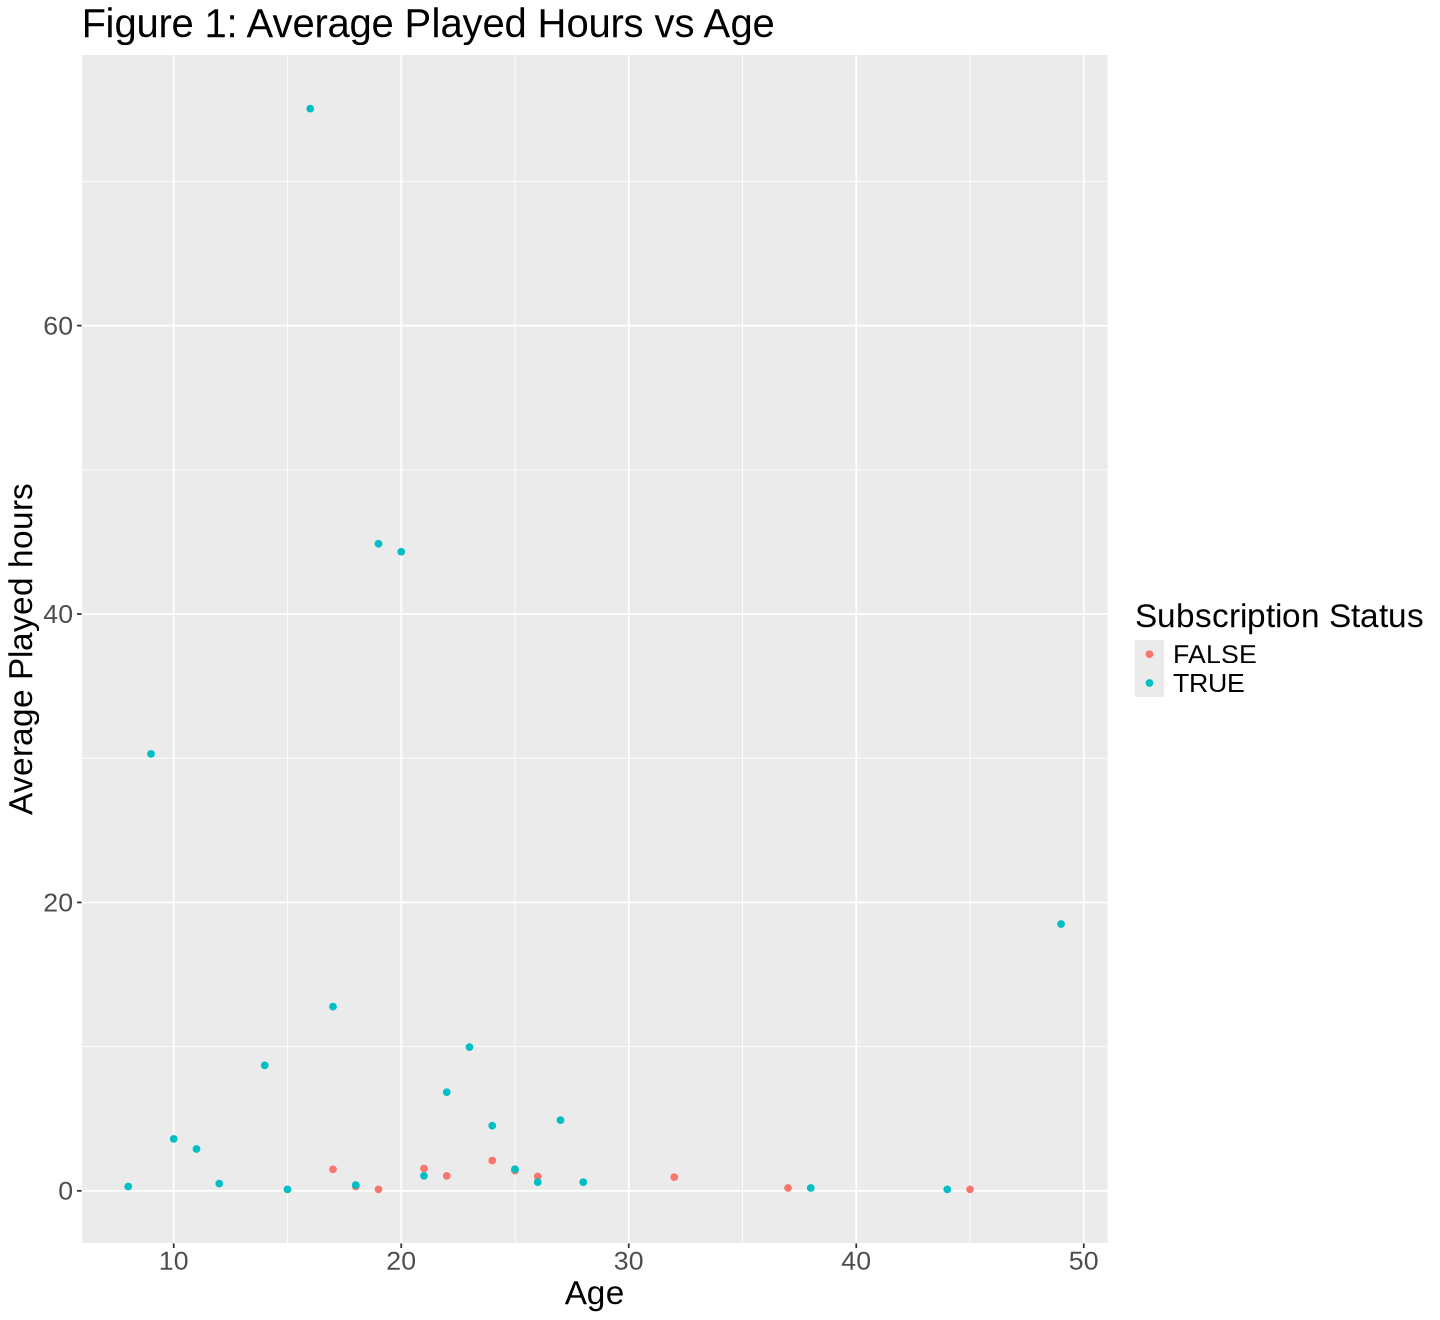

In [5]:
options(repr.plot.width = 12, repr.plot.height = 11)
age_average_played_hours <- clean_player |> group_by(Age, subscribe)|> summarize(average_played_hours = mean(played_hours))|>
ggplot(aes(x= Age, y= average_played_hours, color = subscribe))+
geom_point()+
labs(x= "Age", y= "Average Played hours", title = "Figure 1: Average Played Hours vs Age", color = "Subscription Status")+
theme(text = element_text(size = 20))
age_average_played_hours

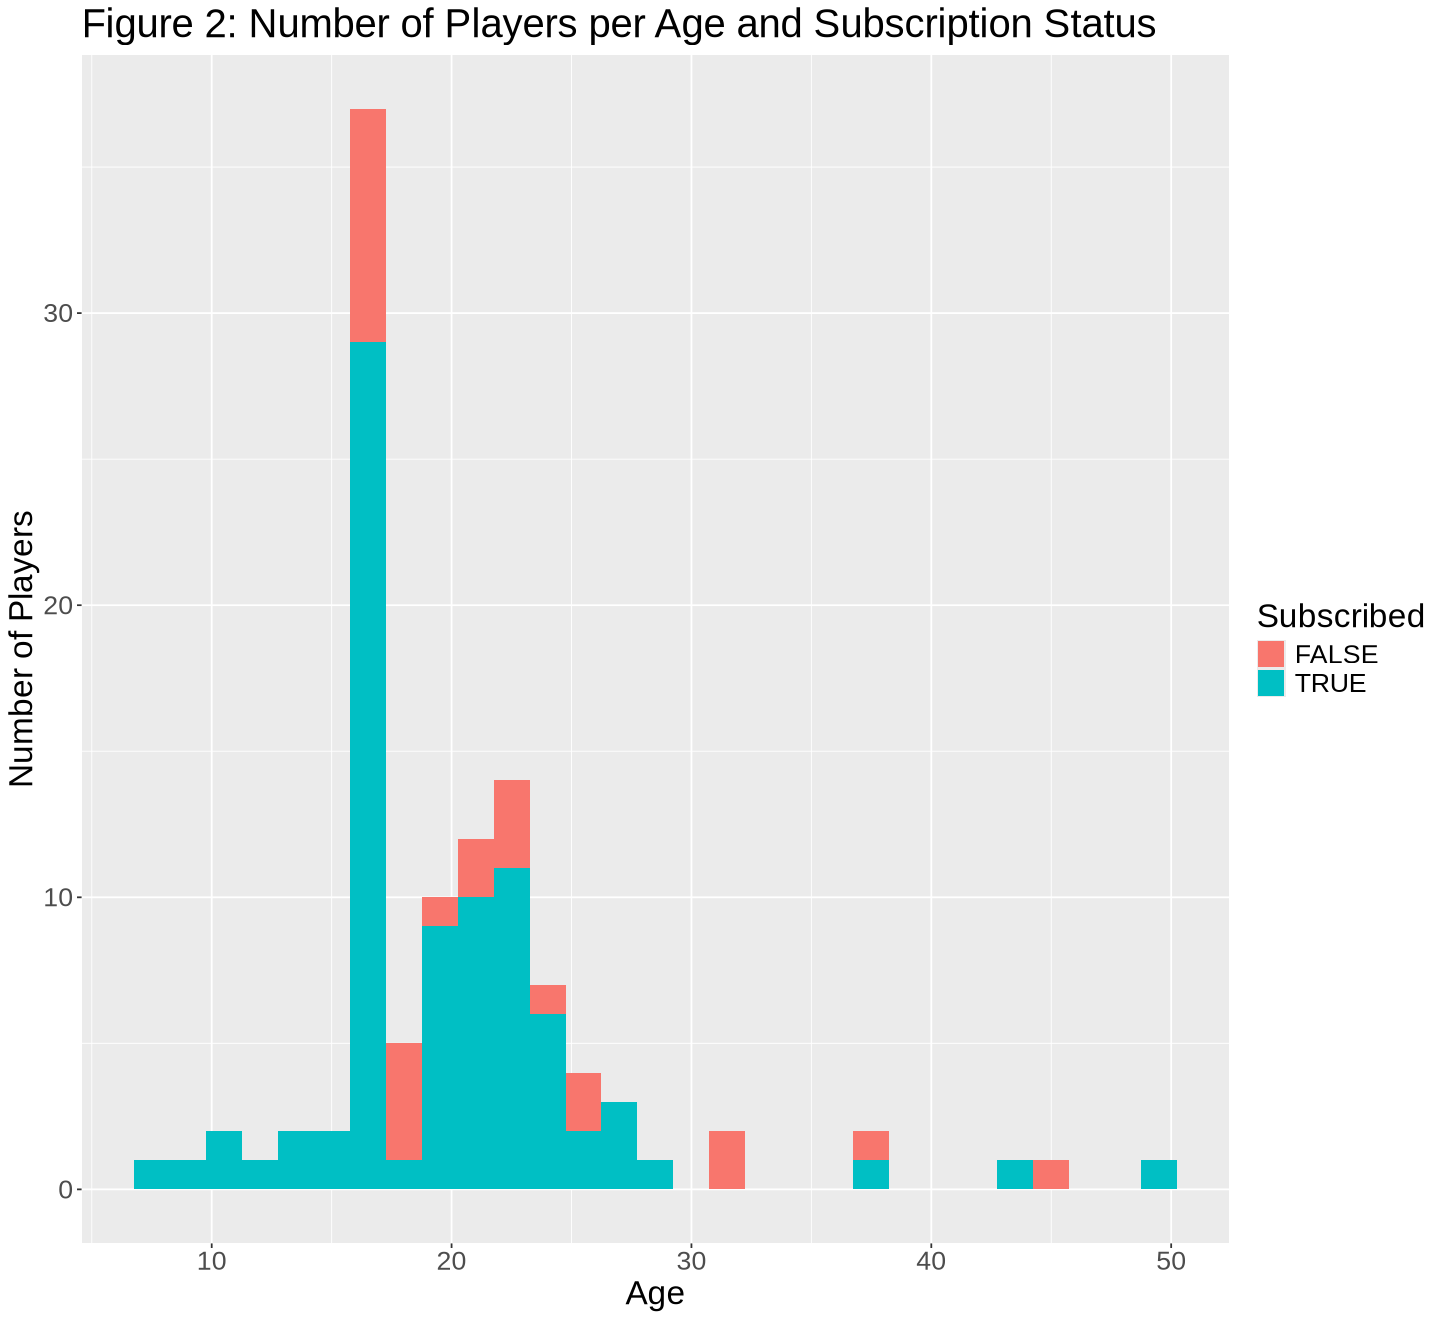

In [6]:
options(repr.plot.width = 12, repr.plot.height = 11)
age_observations <- clean_player |>
ggplot(aes(x= Age, fill = subscribe))+
geom_histogram(binwidth = 1.5)+
labs(x= "Age", y= "Number of Players", title = "Figure 2: Number of Players per Age and Subscription Status", fill = "Subscribed")+
theme(text = element_text(size = 20))
age_observations

### Analysis

In [7]:

set.seed(123)

# Split the data into training (75%) and testing (25%) sets using initial_split()
split <- initial_split(clean_player, prop = 0.75, strata = subscribe)
train_data <- training(split)
test_data  <- testing(split)

# Create a recipe to center and scale the predictors (Age and played_hours)
rec <- recipe(subscribe ~ Age + played_hours, data = train_data) |>
  step_center(all_predictors()) |>
  step_scale(all_predictors())

# Specify a KNN model with neighbors to be tuned using nearest_neighbor()
knn_mod <- nearest_neighbor(neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# Create a workflow combining the recipe and the KNN model
wf <- workflow() |>
  add_recipe(rec) |>
  add_model(knn_mod)

# Set up 5-fold cross-validation on the training data using vfold_cv()
cv_folds <- vfold_cv(train_data, v = 5, strata = subscribe)

# Create a grid of k values to test (from 1 to 10) using tibble()
grid_vals <- tibble(neighbors = 1:10)

# Tune the model using tune_grid() with the defined cross-validation folds and grid
tune_results <- tune_grid(wf, resamples = cv_folds, grid = grid_vals)

# Collect the metrics and select the best k based on accuracy
metrics <- collect_metrics(tune_results)
best_k <- metrics |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean)) |>
  slice(1) |>
  pull(neighbors)
cat("Best k selected:", best_k, "\n")

# Finalize the KNN model using the best k
final_knn_mod <- nearest_neighbor(neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")
final_wf <- workflow() |>
  add_recipe(rec) |>
  add_model(final_knn_mod)
final_fit <- fit(final_wf, data = train_data)

# Predict subscription status on the testing data
predictions <- predict(final_fit, new_data = test_data) |>
  bind_cols(test_data)
predictions


Best k selected: 7 


.pred_class,subscribe,played_hours,Age
<fct>,<fct>,<dbl>,<dbl>
TRUE,TRUE,30.3,9
TRUE,TRUE,3.8,17
TRUE,TRUE,0.5,17
⋮,⋮,⋮,⋮
TRUE,TRUE,0.3,17
TRUE,TRUE,0.1,17
TRUE,TRUE,0.1,44


### Analysis Visualization 

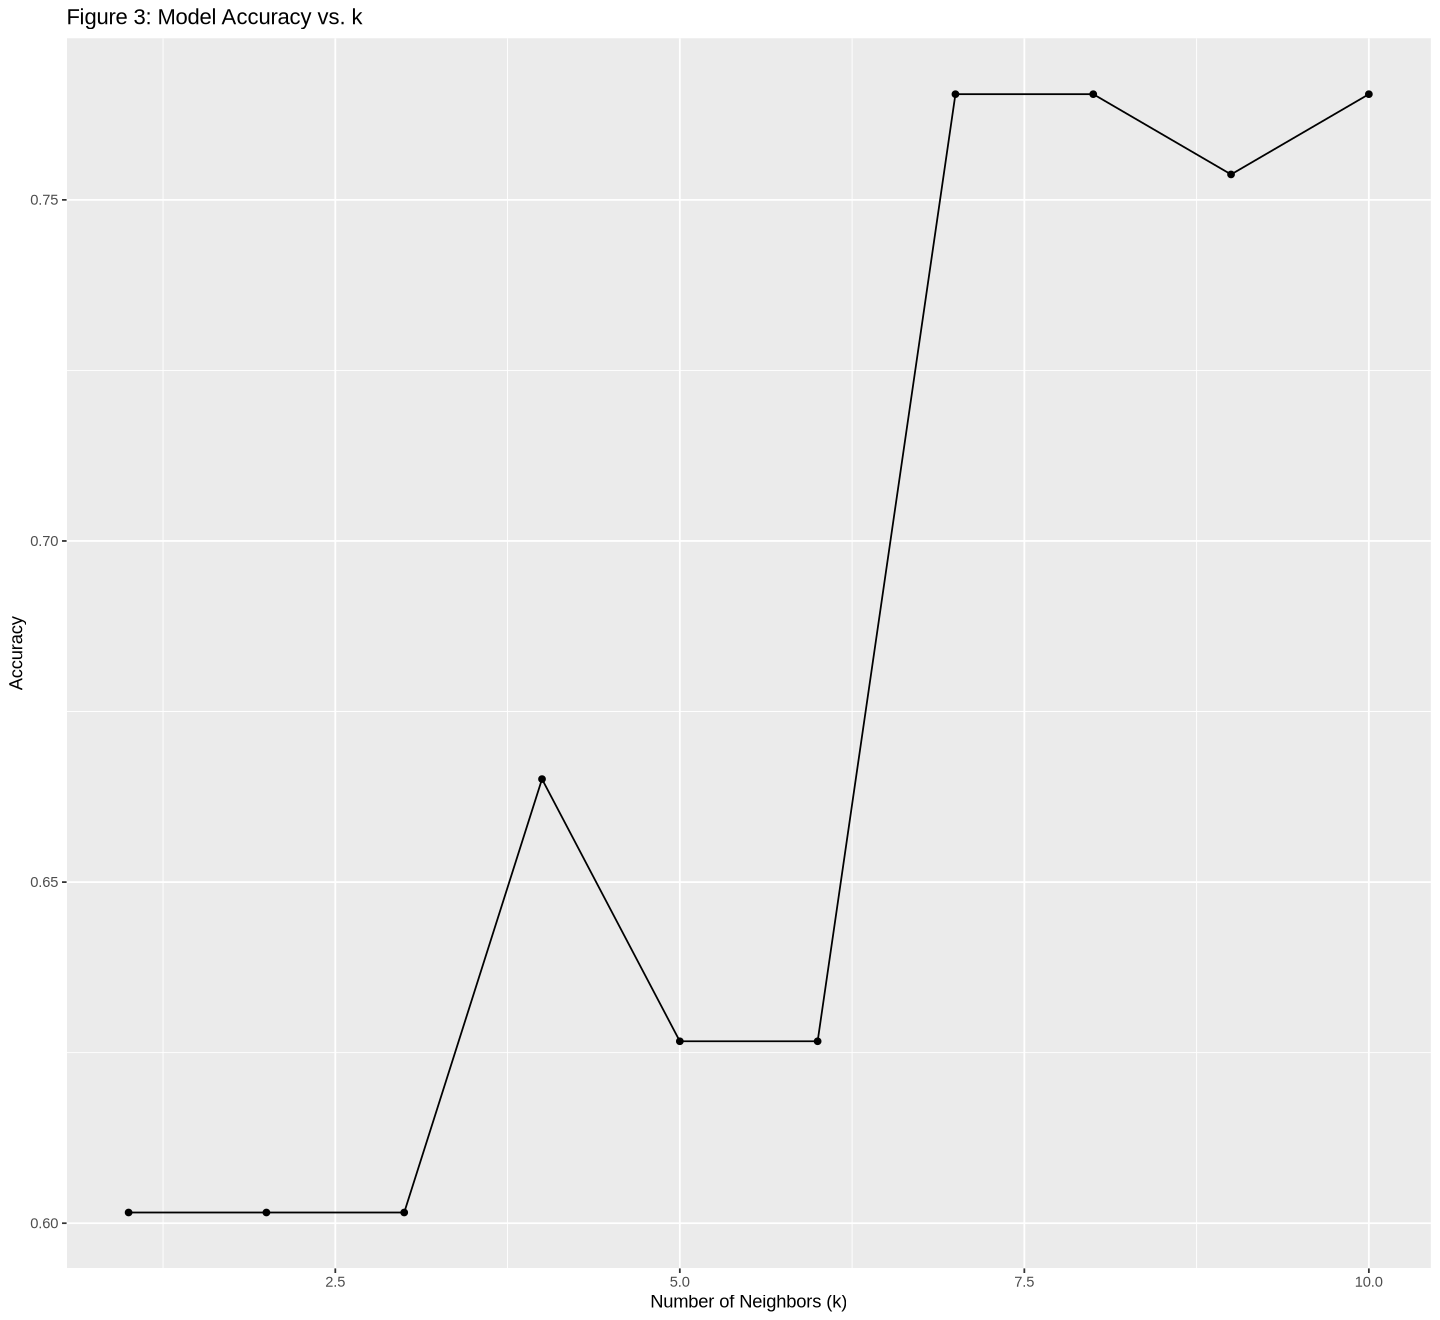

In [8]:
#Accuracy VS K plot
Acc_vs_k_plot<-collect_metrics(tune_results) |>
  filter(.metric == "accuracy") |>
  ggplot(aes(x = neighbors, y = mean)) +
  geom_line() +
  geom_point() +
  labs(
    title = "Figure 3: Model Accuracy vs. k",
    x = "Number of Neighbors (k)",
    y = "Accuracy"
  )

Acc_vs_k_plot

.pred_class,subscribe,played_hours,Age
<fct>,<fct>,<dbl>,<dbl>
TRUE,TRUE,30.3,9
TRUE,TRUE,3.8,17
TRUE,TRUE,0.5,17
⋮,⋮,⋮,⋮
TRUE,TRUE,0.3,17
TRUE,TRUE,0.1,17
TRUE,TRUE,0.1,44


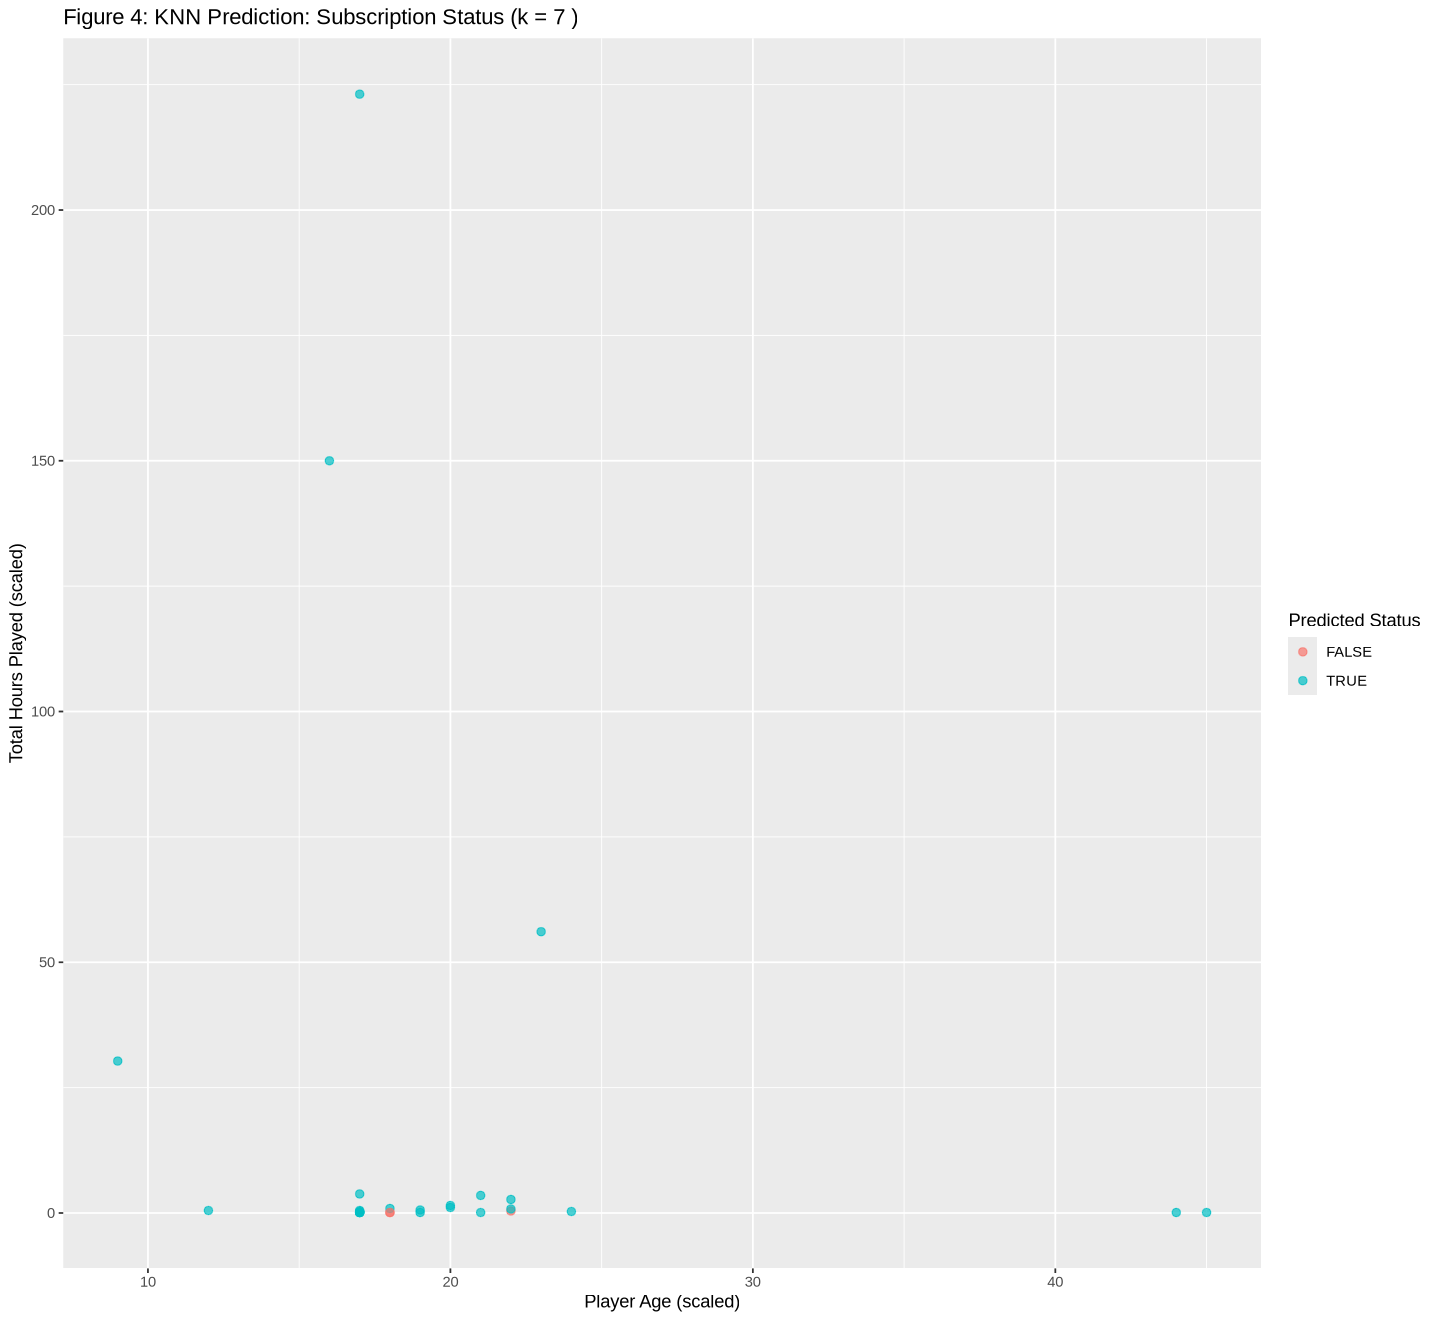

In [11]:
# --- Basic Visualization ---
# Scatter plot of testing data: Age vs. played_hours colored by predicted subscription status
predictions |>
  ggplot(aes(x = Age, y = played_hours, color = .pred_class)) +
  geom_point(alpha = 0.7, size = 2) +
  labs(
    title = paste("Figure 4: KNN Prediction: Subscription Status (k =", best_k, ")"),
    x = "Player Age (scaled)",
    y = "Total Hours Played (scaled)",
    color = "Predicted Status")
 

predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7857143


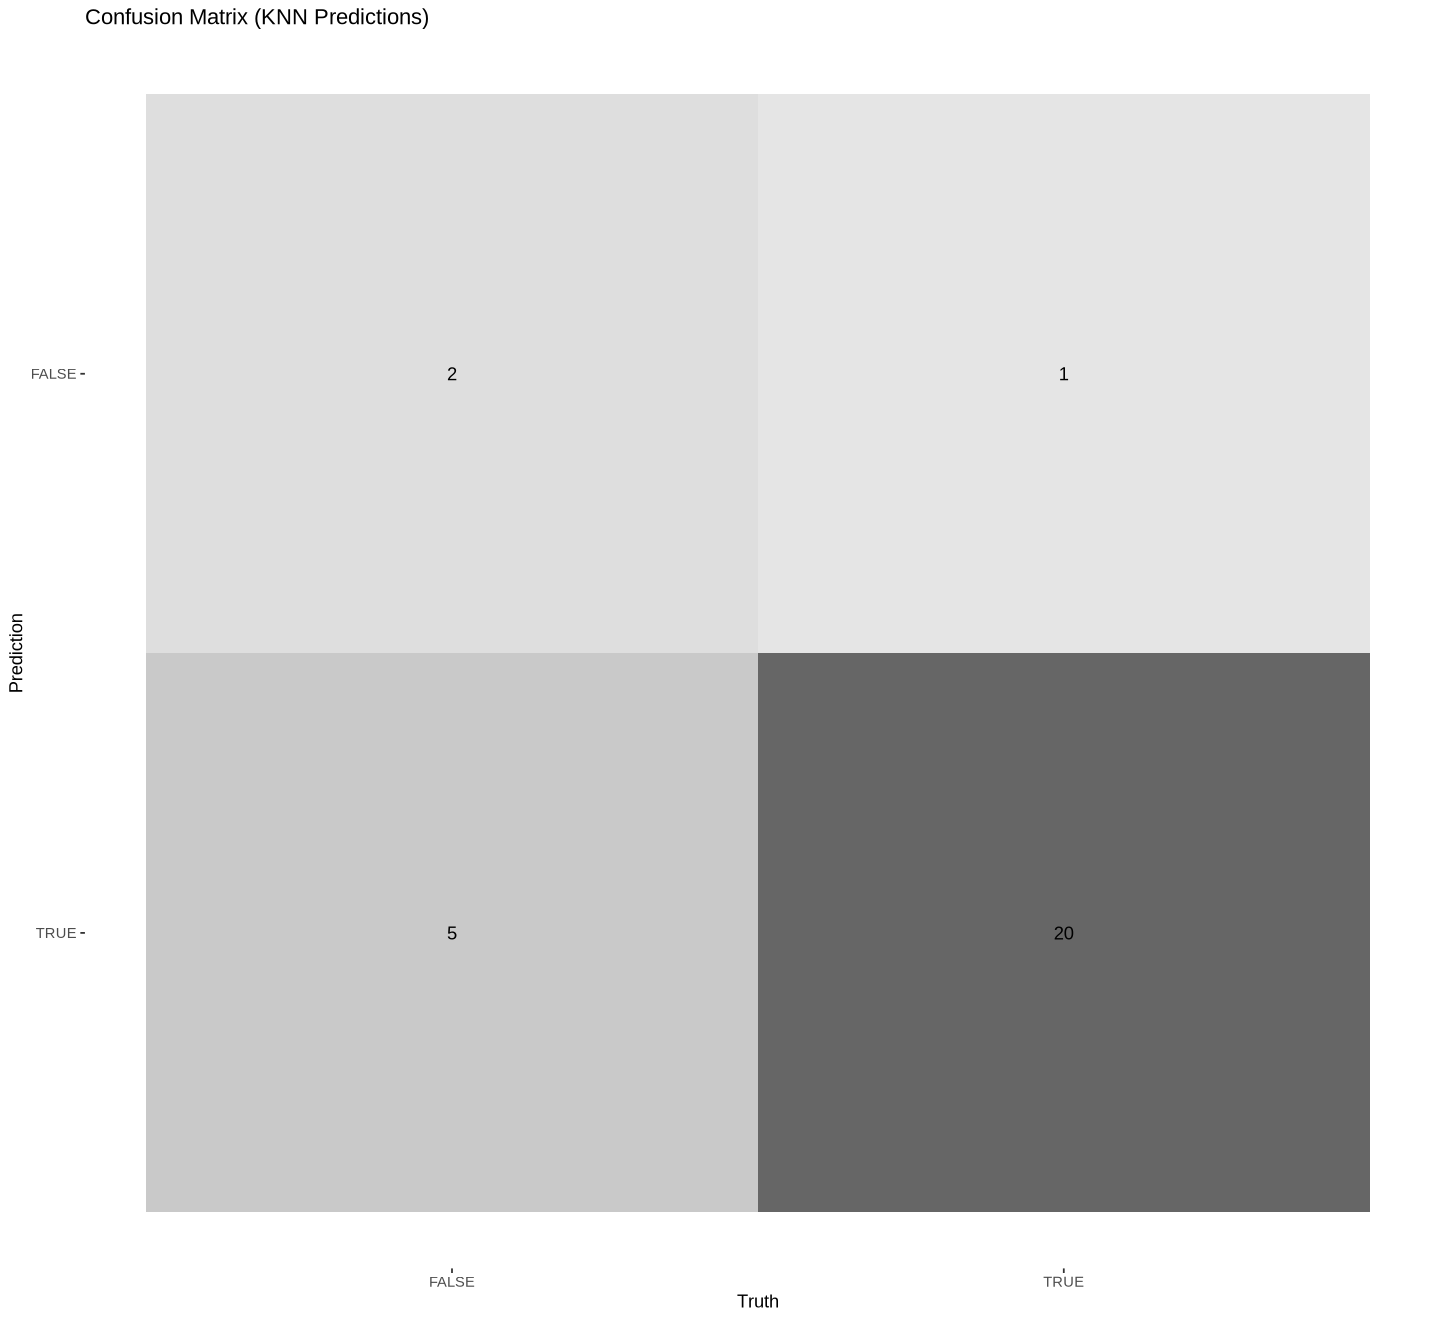

In [10]:
library(yardstick)

pred_matrix<- conf_mat(predictions, truth = subscribe, estimate = .pred_class) |>
  autoplot(type = "heatmap") +
  labs(title = "Confusion Matrix (KNN Predictions)")

pred_matrix

metrics<-predictions|>
    metrics(truth=subscribe, estimate=.pred_class)|>
    filter(.metric=="accuracy")

metrics

## Discussion

### Summary of Findings
In our K-Nearest Neighbor classification analysis, by using a 75:25 training testing split and a 5-fold cross-validation, K= 7 will provide the highest accuracy. However, according to Figure 3, a K value of 8 or 10 would also have given the same level of accuracy. The final model had an accuracy of 78.6%.
$$
Recall = \frac{20}{20 + 1} =95.2\%
$$
$$
Precision = \frac{20}{20+5}=80\%
$$
So, this model is able to identify true positives 95.2% of the time but it is only correct about True predictions 80% of the time. For the purpose of the model, these are good values even if the precision is relatively low compared to the recall.
According to Figure 4, our model predicts that players in their 20s with low playtimes will be the most likely to not be subscribed to the newsletter. 
### Hypothesis vs Results

The objective has been met, as our model can predict subscription with Age and Played hours with a pretty high accuracy of 78.6%. We hypothesized that players with greater played hours and a younger age would tend to subscribe to the game-related newsletter. According to KNN prediction: Subscription Status (k=7) graph, a dense cluster of the data points from age 13-25 indicated "TRUE" for the subscription, which supports how a younger age tends to subscribe more. However, a dense cluster of data points below 25 hours played time still shows mostly TRUE predictions for subscription, which does not support the hypothesis. Overall, the hypothesis is not supported.
### Impact

### Future Analysis

### Reference
(1)The University of British Columbia. (n.d.). Retrieved March 29, 2025, from https://canvas.ubc.ca/courses/153254/assignments/2055150?module_item_id=7644030
